<a href="https://colab.research.google.com/github/PabloGP10/Evaluaci-n/blob/main/Act_4_Nulos_y_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#cargar desde un archivo .xls sin indice
Retailers= pd.read_excel('microretailer_mit_lift_lab_actualizado.xlsx')
Retailers.head(10)

In [22]:
#indentificar valores nulos por columnas 
valores_nulos=Retailers.isnull().sum()
valores_nulos

_record_id                                0
_title                                    0
_server_updated_at                        0
_updated_by                               0
_geometry                                 0
                                       ... 
234_willingness_participate_workshop    125
318_shopkeeper_name                     249
319_shopkeepers_last_name               252
236_whatsapp                            255
235_email                               283
Length: 106, dtype: int64

**Valores Nulos**

In [23]:
#indentificar valores nulos por columnas 
valores_nulos=Retailers.isnull().sum().sum()
valores_nulos

18171

In [ ]:
Retailers_Sin_Nulos=Retailers.copy()
Retailers_Sin_Nulos=Retailers_Sin_Nulos.fillna(method='bfill')
Retailers_Sin_Nulos

In [25]:
#indentificar valores nulos por columnas 
valores_nulos=Retailers_Sin_Nulos.isnull().sum().sum()
valores_nulos

1583

In [ ]:
Retailers_Sin_Nulos1=Retailers_Sin_Nulos.copy()
Retailers_Sin_Nulos1=Retailers_Sin_Nulos1.fillna(method='ffill')
Retailers_Sin_Nulos1

In [27]:
#indentificar valores nulos por columnas 
valores_nulos=Retailers_Sin_Nulos1.isnull().sum().sum()
valores_nulos

0

In [28]:
#indentificar valores nulos por columnas 
valores_nulos=Retailers_Sin_Nulos1.isnull().sum()
valores_nulos.head()

_record_id            0
_title                0
_server_updated_at    0
_updated_by           0
_geometry             0
dtype: int64

In [29]:
#convertir a archivo xlsx
Retailers_Sin_Nulos1.to_excel("microretailer_actualizado_Nulos.xlsx")

In [195]:
#descargar archivo filtrado en xlsx
from google.colab import files
files.download("microretailer_actualizado_Nulos.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Outliers**

In [30]:
Retailers_Filtrado=Retailers_Sin_Nulos1.copy()


In [31]:
#Identificamos las variables no numéricas para eliminar columnas incecesarias 
#Verificamos información del DataFrame
Retailers_Filtrado.info(200)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 106 columns):
 #    Column                                                      Dtype  
---   ------                                                      -----  
 0    _record_id                                                  object 
 1    _title                                                      object 
 2    _server_updated_at                                          object 
 3    _updated_by                                                 object 
 4    _geometry                                                   object 
 5    _latitude                                                   float64
 6    _longitude                                                  float64
 7    228_store_name                                              object 
 8    229_store_picture                                           object 
 9    232_type_of_store                                           object 
 10   

In [ ]:
#aplicamos filtro de columnas para filtrar las columnas con variables numéricas (se descartaron las columnas que muestran números de telofóno y las coordenadas) 
Retailers_Filtrado1=Retailers_Filtrado.iloc[:,[5,6,13,14,16,21,22,29,31,33,42,45,49,51,56,57,58,59,60,78,90,104,105,]]#columnas no consecutivas
Retailers_Filtrado1

**Método de cuartiles**

In [ ]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=Retailers_Filtrado1

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

In [ ]:
#Encontramos Outliers del Dataframe
outliers_iqr= Retailers_Filtrado1[(y>Limite_Superior_iqr)|(y<Limite_Inferior_iqr)]
outliers_iqr

In [ ]:
#Obtenemos datos limpios del Dataframe
data3_iqr= Retailers_Filtrado1[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

In [ ]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

In [36]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,_latitude,_longitude,97_number_of_customers_in_store,268_number_fridges,104_how_many_shelves_does_the_micro_retailer_have,2_current_permanent_employees,4_number_permanent_employees_last_year,103_number_own_fridges,145_number_direct_competitors,24_burnout,...,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency,163_number_high_perishable_products,236_whatsapp,235_email
0,19.043965,-98.201379,1.0,3.0,3.0,2.0,1.5,3.0,5.0,2.0,...,1.0,3.3,2.0,4.0,10.0,3.0,2.0,10.0,2.226697e+09,NaN
1,19.043975,-98.201696,2.0,0.0,0.0,0.0,0.0,4.0,10.0,3.0,...,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0,2.226697e+09,NaN
2,19.043300,-98.196447,2.0,0.0,0.0,0.0,0.0,4.0,10.0,3.0,...,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0,2.226697e+09,NaN
3,19.040570,-98.197072,1.0,0.0,0.0,0.0,0.0,4.0,10.0,3.0,...,1.0,7.0,2.0,4.0,0.0,3.0,1.0,0.0,2.226697e+09,NaN
4,19.043674,-98.201134,3.0,2.0,3.0,1.3,1.5,4.0,3.0,3.0,...,1.0,7.0,2.0,4.0,0.0,3.0,3.0,30.0,2.226697e+09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325,19.043188,-98.194174,0.0,1.0,7.0,1.3,2.0,2.0,5.0,7.0,...,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0,2.212380e+09,NaN
326,19.043115,-98.194066,1.0,0.0,5.0,1.3,2.0,2.0,5.0,7.0,...,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0,2.212380e+09,NaN
327,19.042809,-98.193439,3.0,1.0,1.0,1.3,2.0,2.0,5.0,7.0,...,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0,2.212380e+09,NaN
328,19.042558,-98.193818,0.0,1.0,1.0,1.3,2.0,2.0,5.0,7.0,...,0.0,1.0,7.0,8.0,1.0,1.0,5.0,0.0,2.212380e+09,NaN


In [38]:
Retailers_Filtrado2=data4_iqr.copy()

In [39]:
#convertir a archivo xlsx
Retailers_Filtrado2.to_excel("microretailer_actualizado_Sin_Outliers.xlsx")

In [194]:
#descargar archivo filtrado en xlsx
from google.colab import files
files.download("microretailer_actualizado_Sin_Outliers.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Regresion lineal Multiple**

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
df= pd.read_csv("microretailer_mit_lift_lab_actualizado.csv")
df


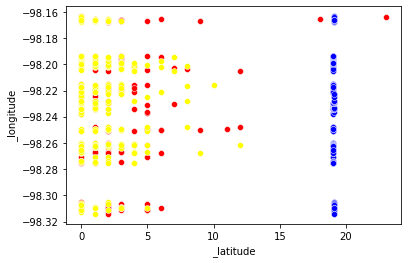

In [70]:
#Se grafican mapas de dispersion de las variables 3 ariables 'alcohol','speeding' y 'no previous'
from turtle import color
sns.scatterplot(x='_latitude',y='_longitude',color='blue',data=df)
sns.scatterplot(x='268_number_fridges',y='_longitude',color='red',data=df)
sns.scatterplot(x='97_number_of_customers_in_store',y='_longitude',color='yellow',data=df)

In [103]:
#Declaramos las variables dependientes (y) e independientes (x) paara la regresion lineal
Vars_Indep=df[['_latitude','97_number_of_customers_in_store','104_how_many_shelves_does_the_micro_retailer_have']]
Var_Dep=df['_longitude']

In [104]:
#Se define model como la función de regresion lineal
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [105]:
#Verificmaos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [106]:
#Ajustamos el modelo con las variables antes declaradas
model.fit(X= Vars_Indep, y=Var_Dep)

LinearRegression()

In [ ]:
#Verificamos los coeficientes obtenidos para el modeloajustado
model.__dict__

In [108]:
#Eavluamos la eficiencia del modelo obtendio por eido del coeficiene R determinación
model.score(Vars_Indep,Var_Dep)

0.18140468178379832

**Modelo Predictivo**

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: alcohol,
y_pred=model.predict(X=df[['_latitude','97_number_of_customers_in_store','104_how_many_shelves_does_the_micro_retailer_have']])
y_pred

In [ ]:
#Insertamos la columna de predicciones en el dataframe
df.insert(0,'Predicciones',y_pred)
df

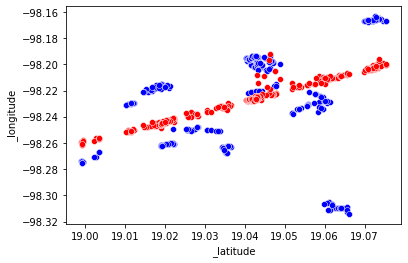

In [111]:
#visualizamos la grafica comparativa entre el total real y el total predecido
sns.scatterplot(x='_latitude',y='_longitude',color='blue',data=df)
sns.scatterplot(x='_latitude',y='Predicciones',color='red',data=df)
#sns.lineplot(x='alcohol',y='Predicciones',color='yellow',data=df)

In [112]:
#Corroboramos cual es el coeficiente de determinación de nuestro modelo
coef_Deter=model.score(X=Vars_Indep, y=Var_Dep)
coef_Deter

0.18140468178379832

In [113]:
#Coroboramos cuel es el coeficiente de corrrelacion de nuestro modelo
coef_correl=np.sqrt(coef_Deter)
coef_correl

0.42591628494787365

**Regresion_logisitca**

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
df= pd.read_csv("microretailer_mit_lift_lab_actualizado.csv")
df

In [ ]:
# Rellenamos nulos
df=df.fillna(method='ffill')
df

In [181]:
#Declaramos las variables dependientes e independientes para la regresion logistica
Vars_Indep=df[['_latitude','97_number_of_customers_in_store','104_how_many_shelves_does_the_micro_retailer_have']]
Var_Dep=df['108_does_the_micro_retailer_has_a_barred_window_']

In [182]:
#definimos las variables
x=Vars_Indep
y=Var_Dep

In [183]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3, random_state =None)

In [184]:
#Se escalan todos los datos
escalar=StandardScaler()

In [185]:
#Para realizar el esclamiento de las variables "x" tanto el entrenamiento como de prueba, utilizaremos fit_transform
x_train=escalar.fit_transform(x_train)
x_test=escalar.fit_transform(x_test)

In [186]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo=LogisticRegression()

In [187]:
#Entrenamos el modelo
algoritmo.fit(x_train,y_train)

LogisticRegression()

In [ ]:
#Realizamos una prediccion
y_pred=algoritmo.predict(x_test)
y_pred

In [189]:
#Verifico la matriz de confusion
from sklearn.metrics import confusion_matrix
matriz=confusion_matrix(y_test,y_pred)
print('Matriz de confusion')
print(matriz)

Matriz de confusion
[[66  0]
 [33  0]]


In [ ]:
#calculo la precision del modelo
from sklearn.metrics import precision_score

precision=precision_score(y_test,y_pred,average='binary',pos_label='yes')
print('Precision del modelo')
print(precision)

In [191]:
#calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
exactitud=accuracy_score(y_test,y_pred)
print('Exactitud del modelo')
print(exactitud)

Exactitud del modelo
0.6666666666666666


In [192]:
#calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
sensibilidad=recall_score(y_test,y_pred,average='binary',pos_label='yes')
print('Sensibilidad del modelo')
print(sensibilidad)

Sensibilidad del modelo
0.0


In [193]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.0
